In [124]:
#Se debe ajustar la curva par amayor resolución
#4

#LIBRERIAS
import numpy as np
import matplotlib.pyplot as plt

# Tamaño de la red
L = 2

# Temperatura
T = np.arange(0.5, 5 , 0.01)
B = 1/T
# Estado inicial del sistema

def initialstate(N):   
    state = 2*np.random.randint(2, size=(N,N))-1
    return state
spin=initialstate(L)
#Veamos los vecinos de los elementos de la red
def posiciones(spin):
    for i in range(np.shape(spin)[0]):
        for j in range(np.shape(spin)[1]):
            x, y = i, j
            if x == 0 and y == 0:
                s1 = spin[0, 1] + spin[1, 0]
            if x == 0 and y == 1:
                s2 = spin[0, 0] + spin[1, 1]
            if x == 1 and y == 0:
                s3 = spin[0, 0] + spin[1, 1]
            if x == 1 and y == 1:
                s4 = spin[1, 0] + spin[1, 0]
    return [s1, s2, s3, s4]

In [175]:
#Definimos la funcion que nos da la energia de la red
ep=[]
for i in T:
        
        spin_ini = spin.ravel()
        #Iteramos 1000 veces
        #for m in range(100):
        ln=[]
        #Vemos si el valor del spin cambia ó no
        for j in range(4):
            pho = posiciones(spin)
            h = np.sum(spin)
            pr = 1 / ( 1 + np.exp(- (1/i) *  pho[j] * h ))

            c1 = np.random.rand()

            if pr <c1:
                s_new = -spin_ini[j]                    
            else:
                s_new =  spin_ini[j]
            #Lista de los nuevos valores de spin         
            ln.append(s_new)
        #Redefinimos la red para el siguiente paso
        spin2=([[ln[0], ln[1]], [ln[2], ln[3]]])
        spin=np.array(spin2)
        
        #Calculamos la energia de la red

        li = []
        for k in ln:
            for l in ln:
                h = k * l
                li.append(h)


        ep.append(-1*sum(li))

#Calculamos las energias promedio y energias cuadradas promedio para cada temperatura
ep = np.array(ep)
ep1 = np.cumsum(ep)


ep2 = ep**2
ep22 = np.cumsum(ep2)
e_promedio = []
e_promedio2 = []

for i in range(0,len(ep1)):
    e_promedio.append(ep1[i]/(i + 1))
    
for i in range(0,len(ep22)):
    e_promedio2.append(ep22[i]/(i + 1))

e_promedio = np.array(e_promedio)
e_promedio2 = np.array(e_promedio2)

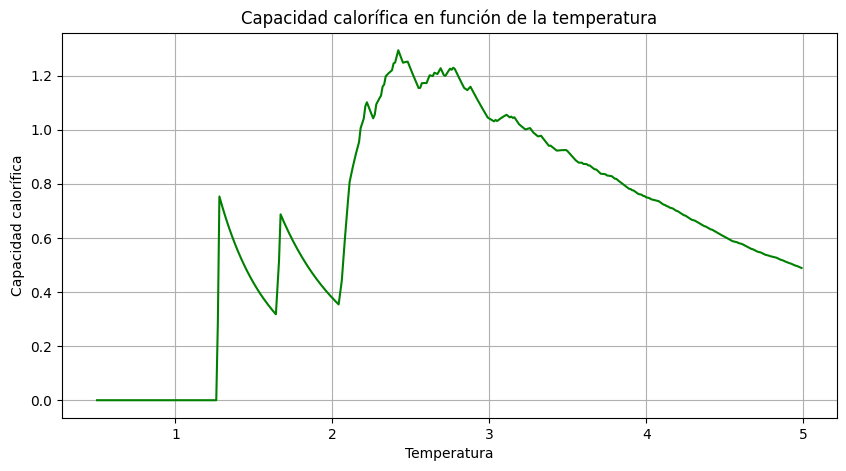

In [176]:
#Grafiquemos la capacidad calorífica
cv = ((B**2) / 4) * (e_promedio2 - e_promedio**2)
plt.figure(figsize=(10,5))
plt.plot(T, cv,color='green')
plt.xlabel('Temperatura')
plt.ylabel('Capacidad calorífica')
plt.title('Capacidad calorífica en función de la temperatura')
plt.grid()
plt.savefig('cv.png')


In [177]:
#Encontremos el indice del valor maximo de un array
def find_max_index(array):
    max = array[0]
    max_index = 0
    for i in range(1, len(array)):
        if array[i] > max:
            max = array[i]
            max_index = i
    return max_index


In [178]:
index=find_max_index(cv)
print('La temperatura critica es:', round(T[index], 2))

La temperatura critica es: 2.42
